<a href="https://colab.research.google.com/github/ilhamydn17/2141720091-MachLearn-2023/blob/week-11/Tugas_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 1
#### Deskripsi
Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

##### Note:
Pada langkah ini saya mencoba menggunakan strategi *data augmentation* yang akan diterapkan pada CNN dengan data CIFAR-10 tersebut.

### Import Library

In [ ]:
from tensorflow.keras.datasets import cifar10
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, GlobalAveragePooling2D, Activation, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from PIL import Image

### Load Data CIFAR

In [ ]:
# Load CIFAR-10 data
(X_train, y_train), (X_test, y_test)= cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print('Training dataset shape:', X_train.shape)
print('Test dataset shape:', X_test.shape)

Training dataset shape: (50000, 32, 32, 3)
Test dataset shape: (10000, 32, 32, 3)


### Normalize Data Train and Test
Converting to float and dividing each instance by 255 so that all the image pixels are between 0 and 1

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

### One Hot Encoder Pada Label

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

### Splitting dataset training dan testing

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

### Membangun dan Compile Model

In [ ]:
# inisisiasi model
model = Sequential()

# Layer konvolusi pertama
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Layer konvolusi kedua
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Layer konvolusi yang ketiga, keempat, dan kelima
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# Layer fully connected
model.add(Flatten())

# Menambahkan hidden layer pada model
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

In [ ]:
# model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 8, 8, 256)         0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 8, 8, 256)        

In [ ]:
def cnn_model():

    model = Sequential()

    # First Conv layer
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(32,32,3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Second Conv layer
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Third, fourth, fifth convolution layer
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))

    # Fully Connected layers
    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(10, activation='softmax'))

    model.summary()

    return model

### Augmentasi data

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

In [ ]:
datagen.fit(X_train)

In [ ]:
datagen = ImageDataGenerator(featurewise_center=False,
                            samplewise_center=False,
                            featurewise_std_normalization=False,
                            samplewise_std_normalization=False,
                            zca_whitening=False,
                            rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

datagen.fit(X_train)

In [ ]:
model = cnn_model()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 128)       0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 16, 16, 256)       295168    
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 256)         0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 8, 8, 256)        

### Compile model untuk menyatukan arsitektur model CNN

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam', metrics=['accuracy'])

### Fitting Model

In [ ]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 64),
                    steps_per_epoch = len(X_train) // 64,
                    epochs = 125,
                    validation_data= (X_valid, y_valid),
                    verbose=1)

Epoch 1/125


<ipython-input-55-72f3a81ecd28>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 64),


InvalidArgumentError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc*100:.2f}%")

# Tugas 2
#### Deskripsi
Buatlah model CNN untuk klasifikasi dataset MNIST.

### Import Library

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.image as mpimg

In [2]:
# get MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


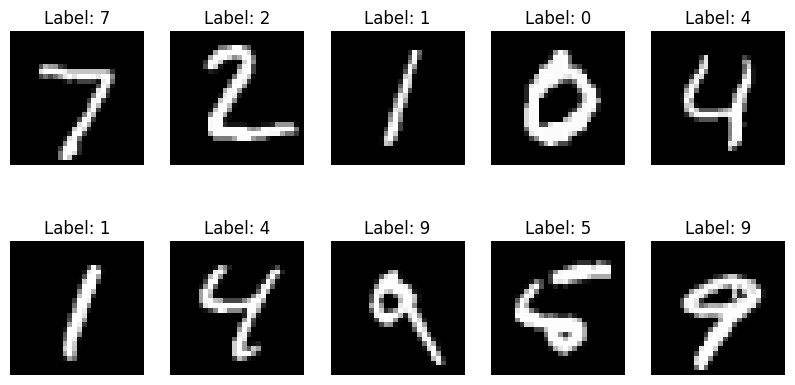

In [4]:
# Display a few sample images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Label: {y_test[i]}")
    plt.axis('off')

plt.show()

### Data Preprocessing

In [8]:
# Check for nan values
print(np.isnan(X_train).any())
print(np.isnan(X_test).any())

False
False


In [9]:
# Normalization and reshaping
input_shape = (28, 28, 1)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train / 255.0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
X_test = X_test / 255.0

In [10]:
# Label Encoding (one hot encoding)

y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

### Building Model CNN

In [11]:
# Define model CNN
batch = 64
num_class = 10
epochs = 10


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu', input_shape=input_shape),
    tf.keras.layers.Conv2D(32, (5,5), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(strides=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_class, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.RMSprop(epsilon=1e-08), loss='categorical_crossentropy', metrics=['acc'])

In [13]:
# Menambahkan custom callback
# Berguna untuk menghentikan training data ketika akurasi telah tercapai 90% persen saat training
# Meski training masih belum selesai hingga epoch yang telah ditentukan, namun jika akurasi telah memenuhi target training akan dihentikan
class customCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc') > 0.995):
      print('akurasi telah tercapai 99.5%, training dihentikan...')
      self.model.stop_training = True

callbacks = customCallback()


In [14]:
# Fitting Model
history = model.fit(X_train, y_train,
                    batch_size = batch,
                    epochs = epochs,
                    validation_split = 0.1,
                    callbacks = [callbacks]
                    )

Epoch 1/10
844/844 [==============================] - 18s 8ms/step - loss: 0.2203 - acc: 0.9313 - val_loss: 0.0456 - val_acc: 0.9863
Epoch 2/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0751 - acc: 0.9780 - val_loss: 0.0355 - val_acc: 0.9900
Epoch 3/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0580 - acc: 0.9834 - val_loss: 0.0331 - val_acc: 0.9898
Epoch 4/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0473 - acc: 0.9864 - val_loss: 0.0320 - val_acc: 0.9910
Epoch 5/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0427 - acc: 0.9878 - val_loss: 0.0382 - val_acc: 0.9923
Epoch 6/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0414 - acc: 0.9886 - val_loss: 0.0265 - val_acc: 0.9938
Epoch 7/10
844/844 [==============================] - 7s 8ms/step - loss: 0.0381 - acc: 0.9889 - val_loss: 0.0346 - val_acc: 0.9930
Epoch 8/10
844/844 [==============================] - 6s 7ms/step - loss: 0

### Evaluate Model

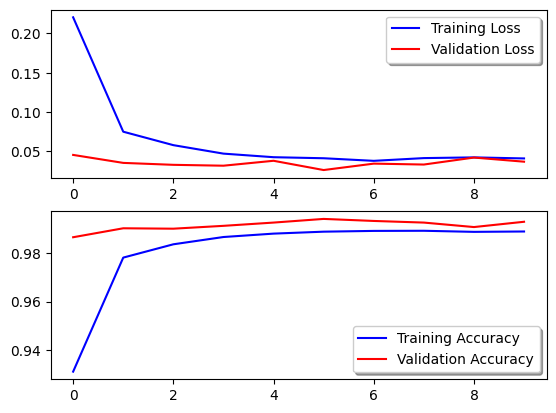

In [15]:
# Loss and Accuracy
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [18]:
# Prediction
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0260 - acc: 0.9925


In [19]:
# Confussion Matrix
# predict from testing dataset
y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
y_pred_class = np.argmax(y_pred,axis = 1)
# Convert testing observations to one hot vectors
y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_class)

313/313 [==============================] - 1s 2ms/step


<Axes: >

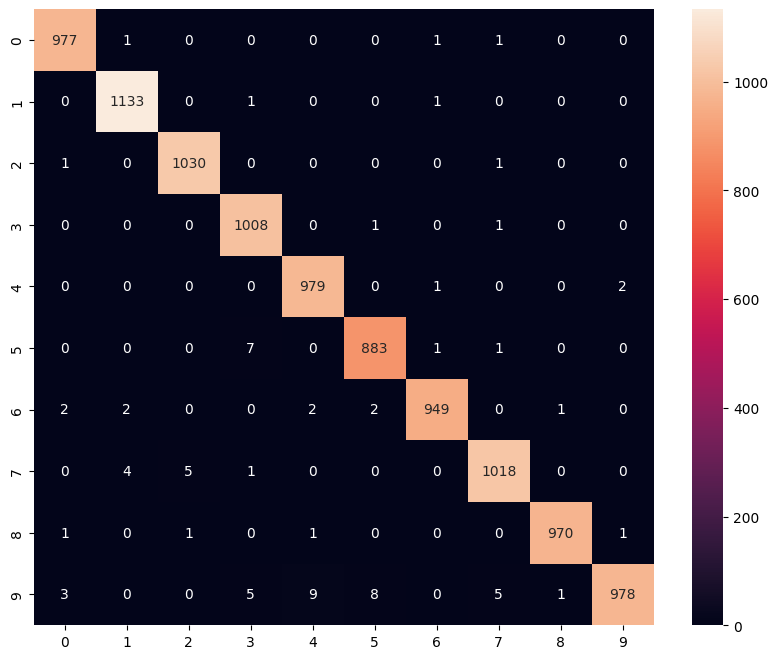

In [20]:
# visualisaztion confussion matrix with seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')

1/1 [==============================] - 0s 17ms/step


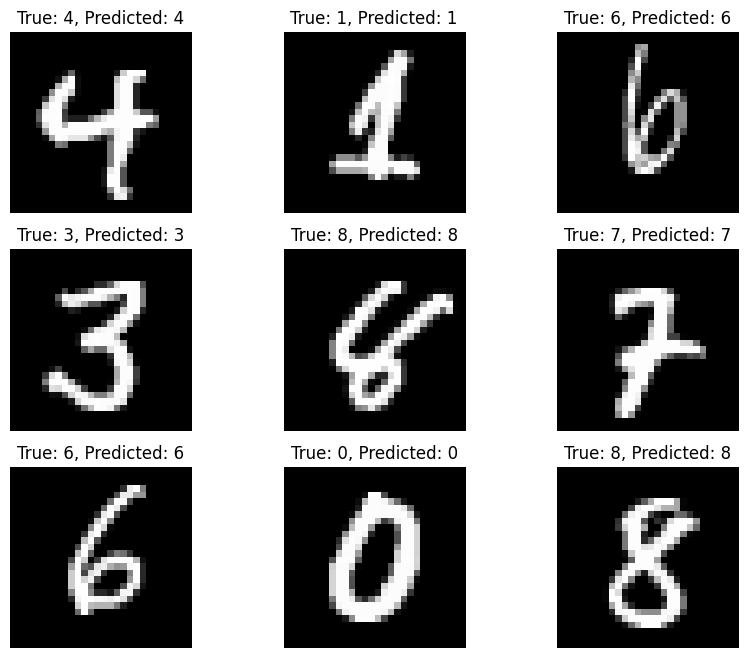

In [23]:
# testing to prediction image

# Choose 9 random indices from the test set
indices = np.random.choice(len(X_test), size=9, replace=False)

# Plot the 9 images
plt.figure(figsize=(10, 8))
for i, index in enumerate(indices, 1):
    plt.subplot(3, 3, i)

    # Get the image and true label
    test_image = X_test[index]
    true_label = np.argmax(y_test[index])

    # Reshape the image to (1, 28, 28, 1) to match the input shape of the model
    test_image = np.expand_dims(test_image, axis=0)

    # Get the model prediction
    prediction = model.predict(test_image)
    predicted_label = np.argmax(prediction)

    # Display the true label, predicted label, and the image
    plt.imshow(test_image[0, :, :, 0], cmap='gray')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')
    plt.axis('off')

plt.show()
